In [1]:
import graph_tool.all as gt
import schist as scs
import scanpy as sc
import scipy.spatial
import scipy.cluster
import pandas as pd
import seaborn as sns
import sklearn.metrics
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [106]:
d = {}
pc = [5, 10, 15, 20, 25, 30]
nn = [15, 20, 25, 30, 35]

In [107]:
for p in pc:
    d[p] = {}
    for n in nn:
        d[p][n] = scs.io.read(f'Crypt/Crypt_pc{p}_n{n}')

/Users/cittaro.davide/anaconda3/envs/experimental/lib/python3.8/site-packages/graph_tool/inference/blockmodel.py:387: UserWarning: unrecognized keyword arguments: ['sampling']
  warnings.warn("unrecognized keyword arguments: " +


In [108]:
n_levels = 5

In [109]:
c = [f'{p}_{n}_{l}' for p in pc for n in nn for l in range(n_levels)]

df = pd.DataFrame( index=d[10][15].obs_names, columns=c)

for p in pc: 
    for n in nn:
        for l in range(n_levels):
            df[f'{p}_{n}_{l}'] = d[p][n].obs[f'nsbm_level_{l}'].astype(int)

c = df.columns
dm = []
for x in range(len(c) - 1):
    for y in range(x + 1, len(c)):
        dm.append(sklearn.metrics.adjusted_rand_score(df.values[:, x], df.values[:, y]))
#        dm.append(gt.partition_overlap(df.values[:, x], df.values[:, y]))

dmf = pd.DataFrame(scipy.spatial.distance.squareform(dm), index=df.columns, columns=df.columns)


annot = pd.DataFrame([x.split('_') for x in c], columns=['n_pcs', 'n_neighbors', 'nsbm_level'], index=c)

for c in annot.columns:
    annot[c] = pd.Categorical(annot[c])

annot['n_pcs'].cat.rename_categories(['C0', 'C1', 'C2', 'C3', 'C4', 'C5'], inplace=True)
annot['n_neighbors'].cat.rename_categories(['C0', 'C1', 'C2', 'C3', 'C4'], inplace=True)
annot['nsbm_level'].cat.rename_categories(['C0', 'C1', 'C2', 'C3', 'C4'], inplace=True)

In [120]:
sdf0 = pd.DataFrame(0, index=df.columns, columns=['n_pcs', 'n_neighbors', 'level','n_communities', 'ave_size', 'min_size', 'max_size'])

for p in pc:
    for n in nn:
        for l in range(n_levels):
            gr = d[p][n].obs[f'nsbm_level_{l}']
            counts = gr.value_counts()
            sdf0.loc[f'{p}_{n}_{l}'] = [p, n, l, len(counts), np.mean(counts.values), np.min(counts.values),np.max(counts.values)]

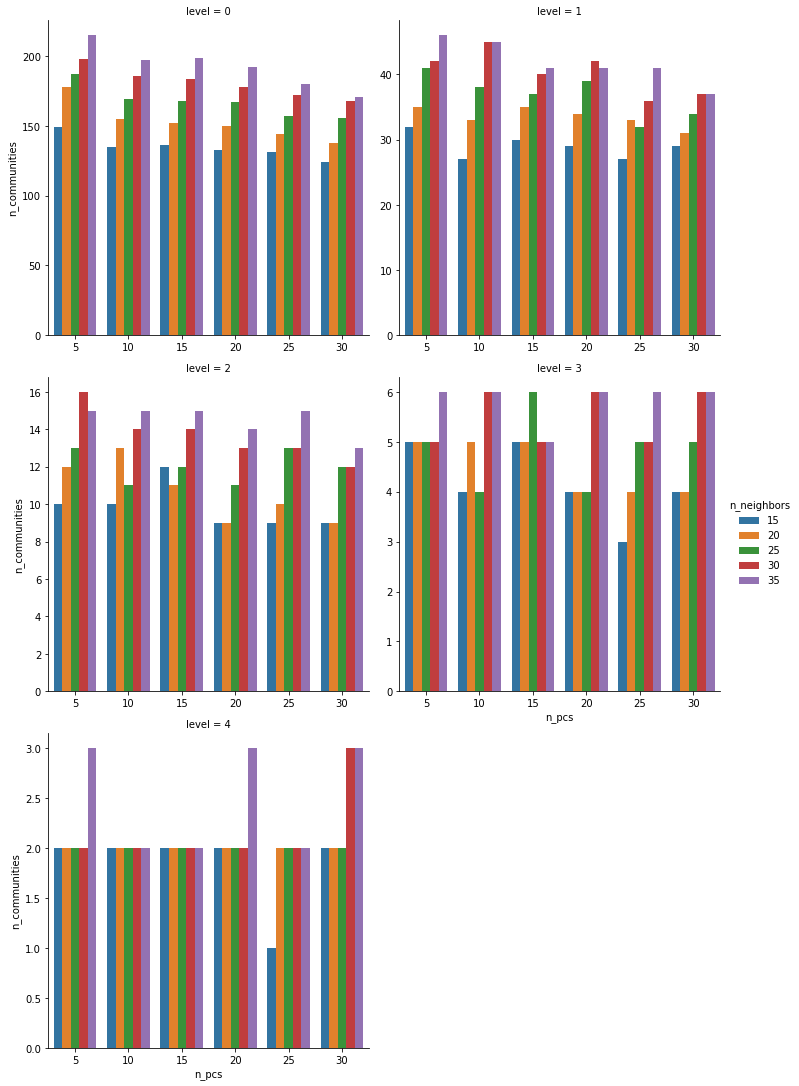

In [122]:
sns.catplot(data = sdf0, x='n_pcs', y='n_communities', hue='n_neighbors', 
            col='level', kind='bar', col_wrap=2,sharex=False, sharey=False,)
savefig("Community_Count_Crypt.pdf", dpi=300)

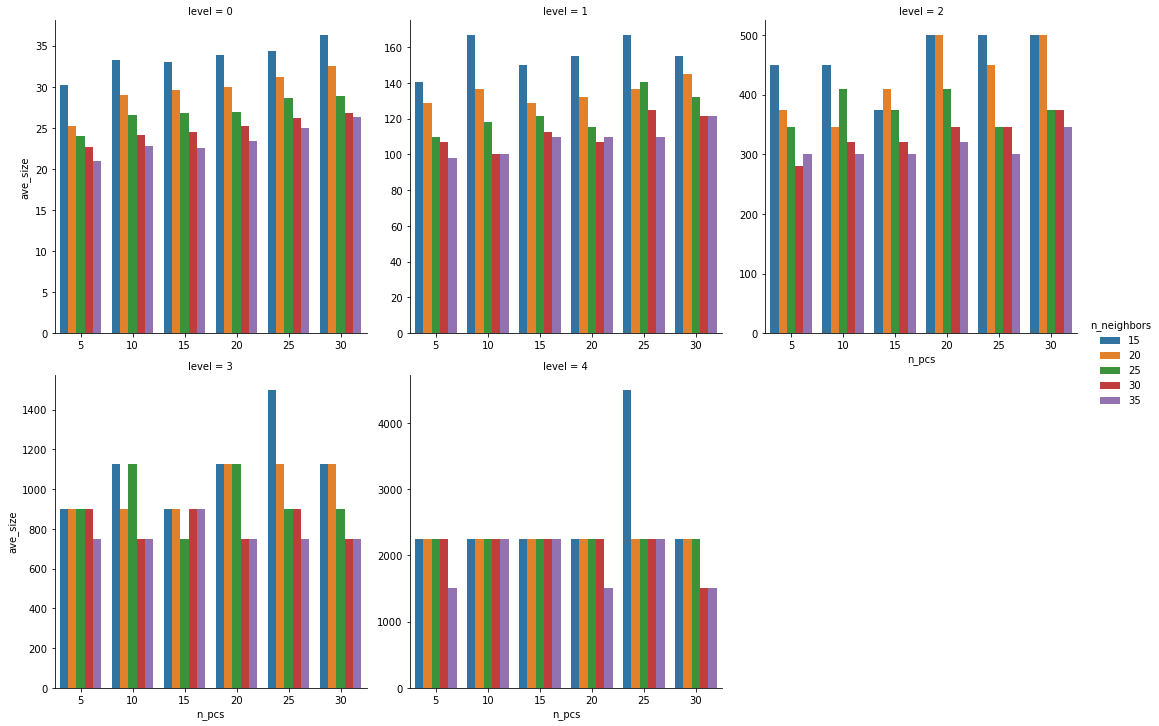

In [123]:
sns.catplot(data = sdf0, x='n_pcs', y='ave_size', hue='n_neighbors', 
            col='level', kind='bar', col_wrap=3,sharex=False, sharey=False)

In [124]:
#sdf1 = pd.DataFrame(0, index=df.columns, columns=['n_pcs', 'n_neighbors', 'level','communities'])
sdf1 = []
P = []
N = []
L = []
C = []
for p in pc:
    for n in nn:
        for l in range(n_levels):
            gr = d[p][n].obs[f'nsbm_level_{l}']
            counts = gr.value_counts()
            n_c = len(counts)
            P = P + ([p] * n_c)
            N = N + ([n] * n_c)
            L = L + ([l] * n_c)
            C = C + list(counts.values)


sdf1 = pd.DataFrame([P, N, L, C], index=['n_pcs', 'n_neighbors', 'level', 'size']).T
             

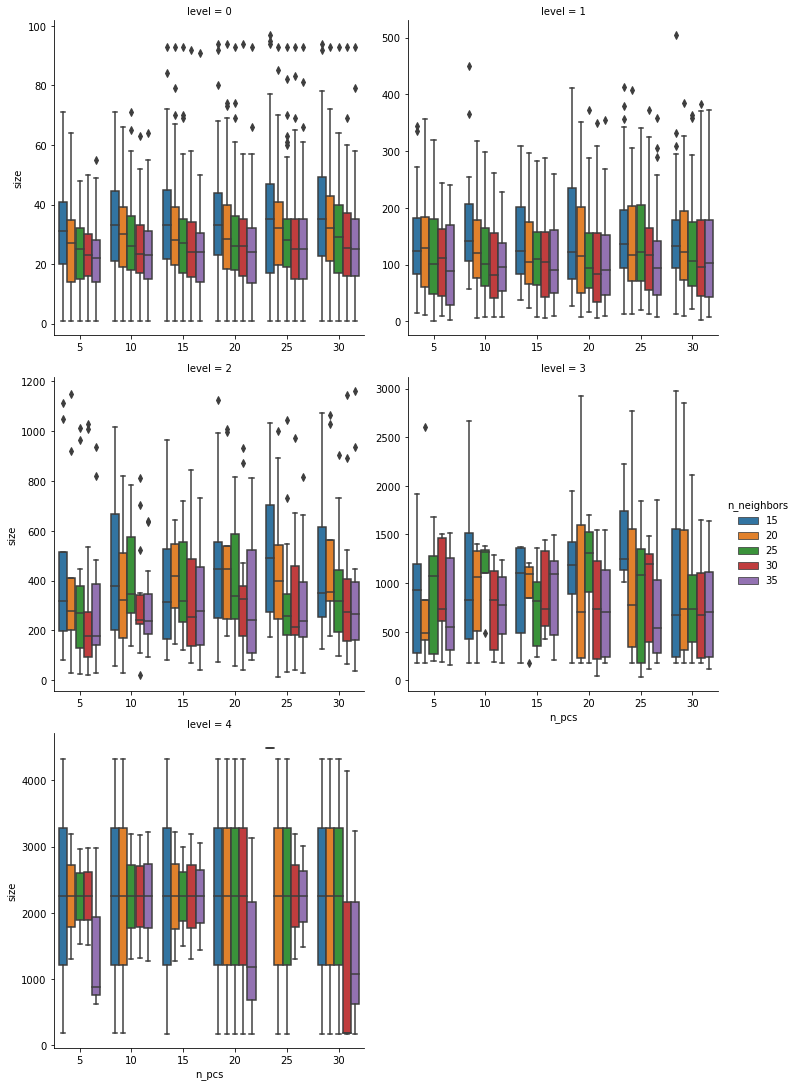

In [126]:
sns.catplot(data = sdf1, x='n_pcs', y='size', hue='n_neighbors', 
            col='level', kind='box', 
            col_wrap=2,sharex=False, sharey=False)
savefig("Community_Size_Crypt.pdf", dpi=300)

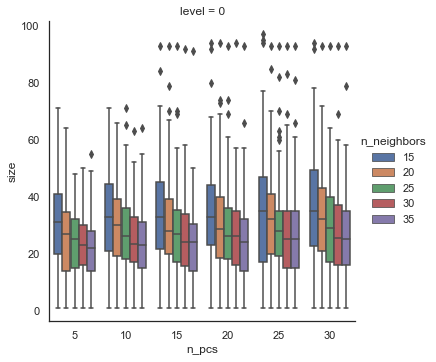

In [219]:
sns.set_style('white')
sns.catplot(data = sdf1.query('level == 0'), x='n_pcs', y='size', hue='n_neighbors', 
            col='level', kind='box', 
            sharex=False, sharey=False)
savefig("Community_Size_Crypt_L0.pdf", dpi=300)

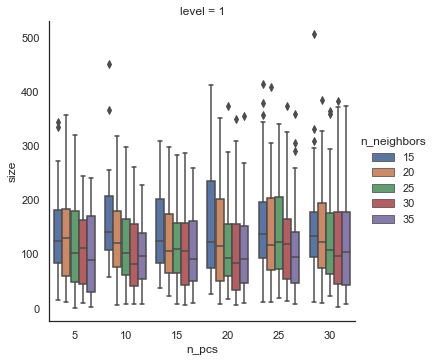

In [227]:
sns.set_style('white')
sns.catplot(data = sdf1.query('level == 1'), x='n_pcs', y='size', hue='n_neighbors', 
            col='level', kind='box', 
            sharex=False, sharey=False)
savefig("Community_Size_Crypt_L1.pdf", dpi=300)

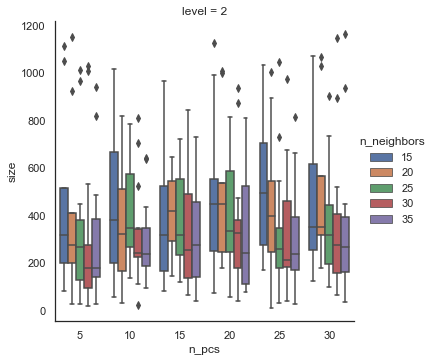

In [241]:
sns.set_style('white')
sns.catplot(data = sdf1.query('level == 2'), x='n_pcs', y='size', hue='n_neighbors', 
            col='level', kind='box', 
            sharex=False, sharey=False)
savefig("Community_Size_Crypt_L2.pdf", dpi=300)

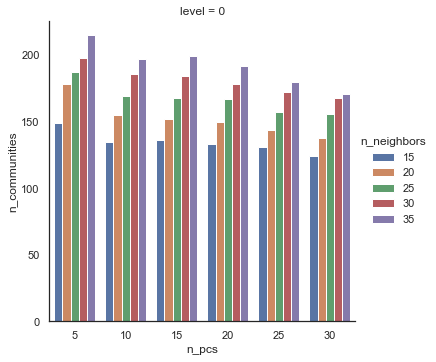

In [224]:
sns.set_style('white')
sns.catplot(data = sdf0.query('level == 0'), x='n_pcs',
            y='n_communities', hue='n_neighbors', 
            col='level', kind='bar', 
            col_wrap=1,sharex=False, sharey=False,)
savefig("Community_Count_Crypt_L0.pdf", dpi=300)

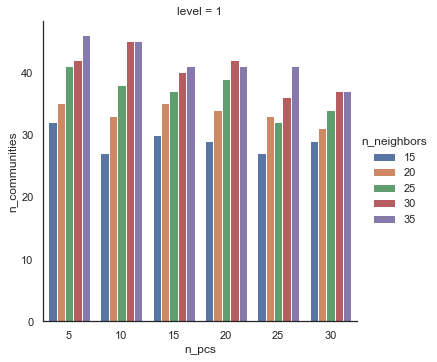

In [228]:
sns.set_style('white')
sns.catplot(data = sdf0.query('level == 1'), x='n_pcs',
            y='n_communities', hue='n_neighbors', 
            col='level', kind='bar', 
            col_wrap=1,sharex=False, sharey=False,)
savefig("Community_Count_Crypt_L1.pdf", dpi=300)

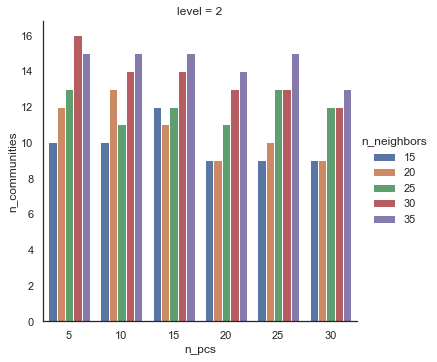

In [240]:
sns.set_style('white')
sns.catplot(data = sdf0.query('level == 2'), x='n_pcs',
            y='n_communities', hue='n_neighbors', 
            col='level', kind='bar', 
            col_wrap=1,sharex=False, sharey=False,)
savefig("Community_Count_Crypt_L2.pdf", dpi=300)

In [129]:
adata = d[10][15]

(1.0, 31.0)

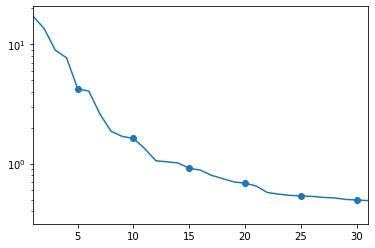

In [130]:
plot(np.arange(50) + 1,adata.uns['pca']['variance'])
yscale('log')
pci = np.array(pc)
scatter(pci, adata.uns['pca']['variance'][pci-1])
xlim(1, 31)

(1.0, 31.0)

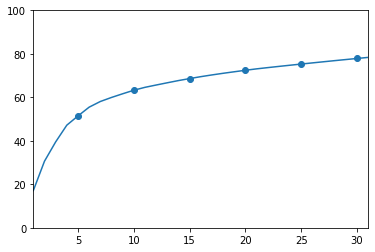

In [131]:
cv = np.cumsum(adata.uns['pca']['variance'])
plot(np.arange(50) + 1, cv)
ylim(0, 100)
scatter(pci, cv[pci-1])
xlim(1, 31)

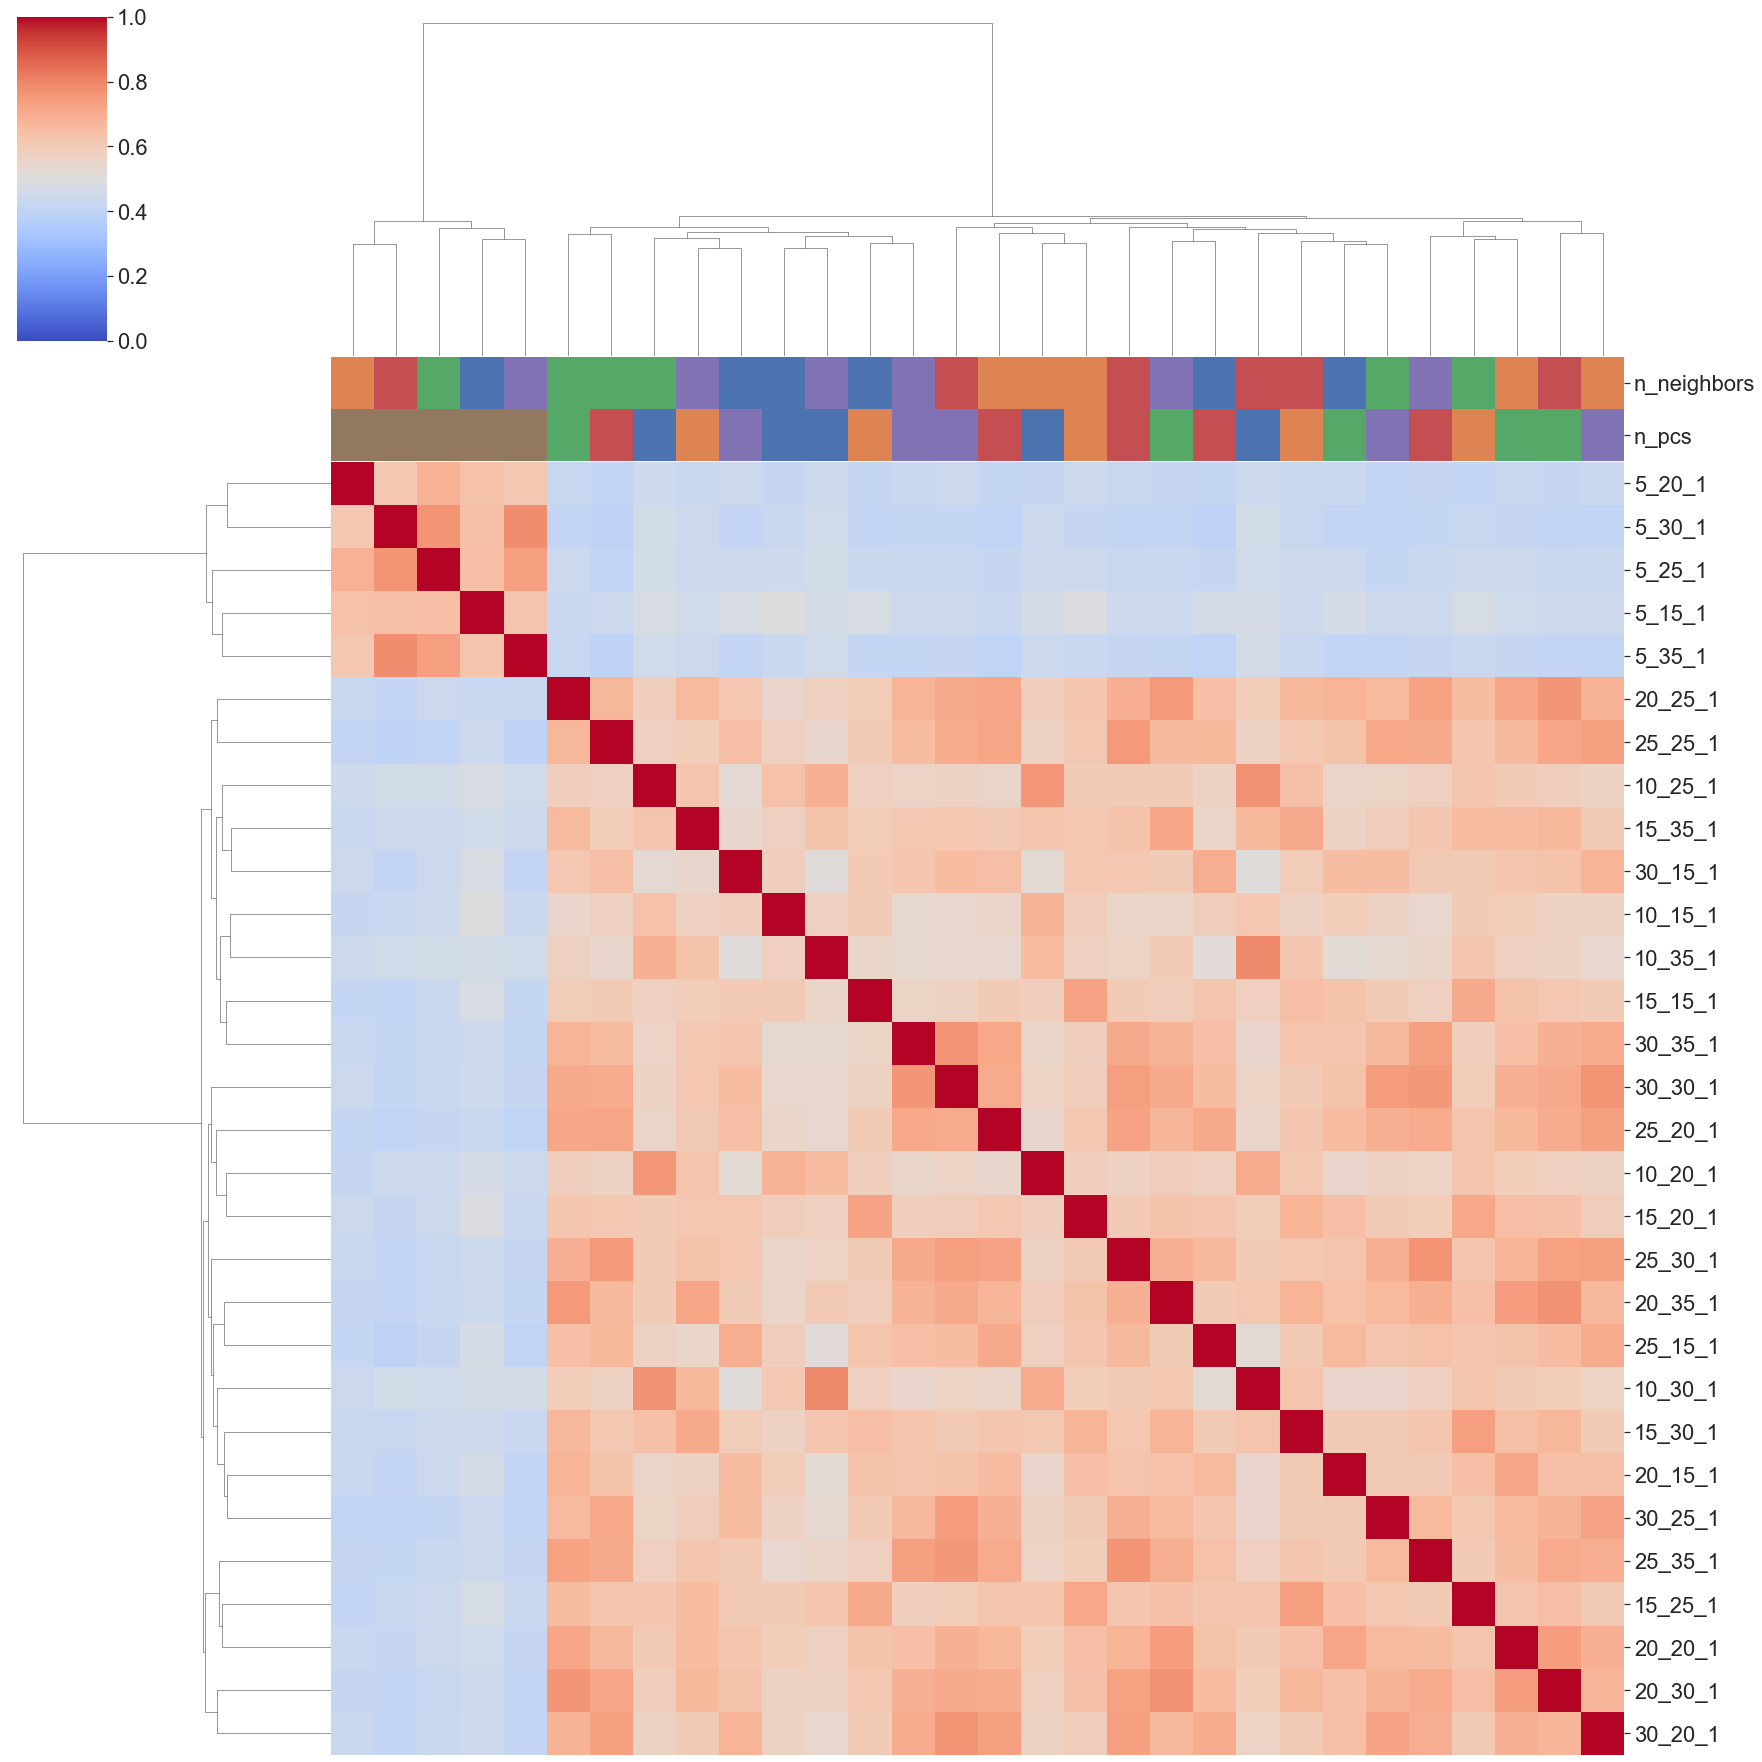

In [191]:
plot_level = 1
ii = [x for x in dmf.index if x.endswith(f'_{plot_level}')]


sdmf = dmf.loc[ii, ii]
cl = scipy.cluster.hierarchy.ward(sdmf)
for x in ii:
    sdmf.loc[x, x] = 1
sns.set(font_scale=2)

for c in annot.columns:
    annot[c] = pd.Categorical(annot[c])
annot['n_pcs'].cat.rename_categories(['C0', 'C1', 'C2', 'C3', 'C4', 'C5'], inplace=True)
annot['n_neighbors'].cat.rename_categories(['C0', 'C1', 'C2', 'C3', 'C4'], inplace=True)
annot['nsbm_level'].cat.rename_categories(['C0', 'C1', 'C2', 'C3', 'C4'], inplace=True)
sns.clustermap(sdmf, col_colors=annot.loc[ii, ['n_neighbors', 'n_pcs']],xticklabels=[],
              yticklabels=ii, figsize=(25, 25),col_linkage=cl, 
               row_linkage=cl, vmin=0, vmax=1, 
              cmap="coolwarm", )#,row_cluster=False,col_cluster=False)
savefig(f"ClusterMap_Crypt_L{plot_level}.pdf", dpi=300)

### By Leiden

In [192]:
for p in pc:
    for n in nn:
        scs.inference.leiden(d[p][n])

In [194]:
for p in pc:
    for n in nn:
        scs.io.write(d[p][n], f'Crypt/Crypt_pc{p}_n{n}')

In [196]:
Lc = [f'{p}_{n}' for p in pc for n in nn]

Ldf = pd.DataFrame( index=d[10][15].obs_names, columns=Lc)

for p in pc: 
    for n in nn:
        Ldf[f'{p}_{n}'] = d[p][n].obs['leiden'].astype(int)

Lc = Ldf.columns
Ldm = []
for x in range(len(Lc) - 1):
    for y in range(x + 1, len(Lc)):
        Ldm.append(sklearn.metrics.adjusted_rand_score(Ldf.values[:, x], Ldf.values[:, y]))
#        dm.append(gt.partition_overlap(df.values[:, x], df.values[:, y]))

Ldmf = pd.DataFrame(scipy.spatial.distance.squareform(Ldm), index=Ldf.columns, columns=Ldf.columns)

Lannot = pd.DataFrame([x.split('_') for x in Lc], columns=['n_pcs', 'n_neighbors'], index=Lc)

for c in Lannot.columns:
    Lannot[c] = pd.Categorical(Lannot[c])

Lannot['n_pcs'].cat.rename_categories(['C0', 'C1', 'C2', 'C3', 'C4', 'C5'], inplace=True)
Lannot['n_neighbors'].cat.rename_categories(['C0', 'C1', 'C2', 'C3', 'C4'], inplace=True)

/Users/cittaro.davide/anaconda3/envs/experimental/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


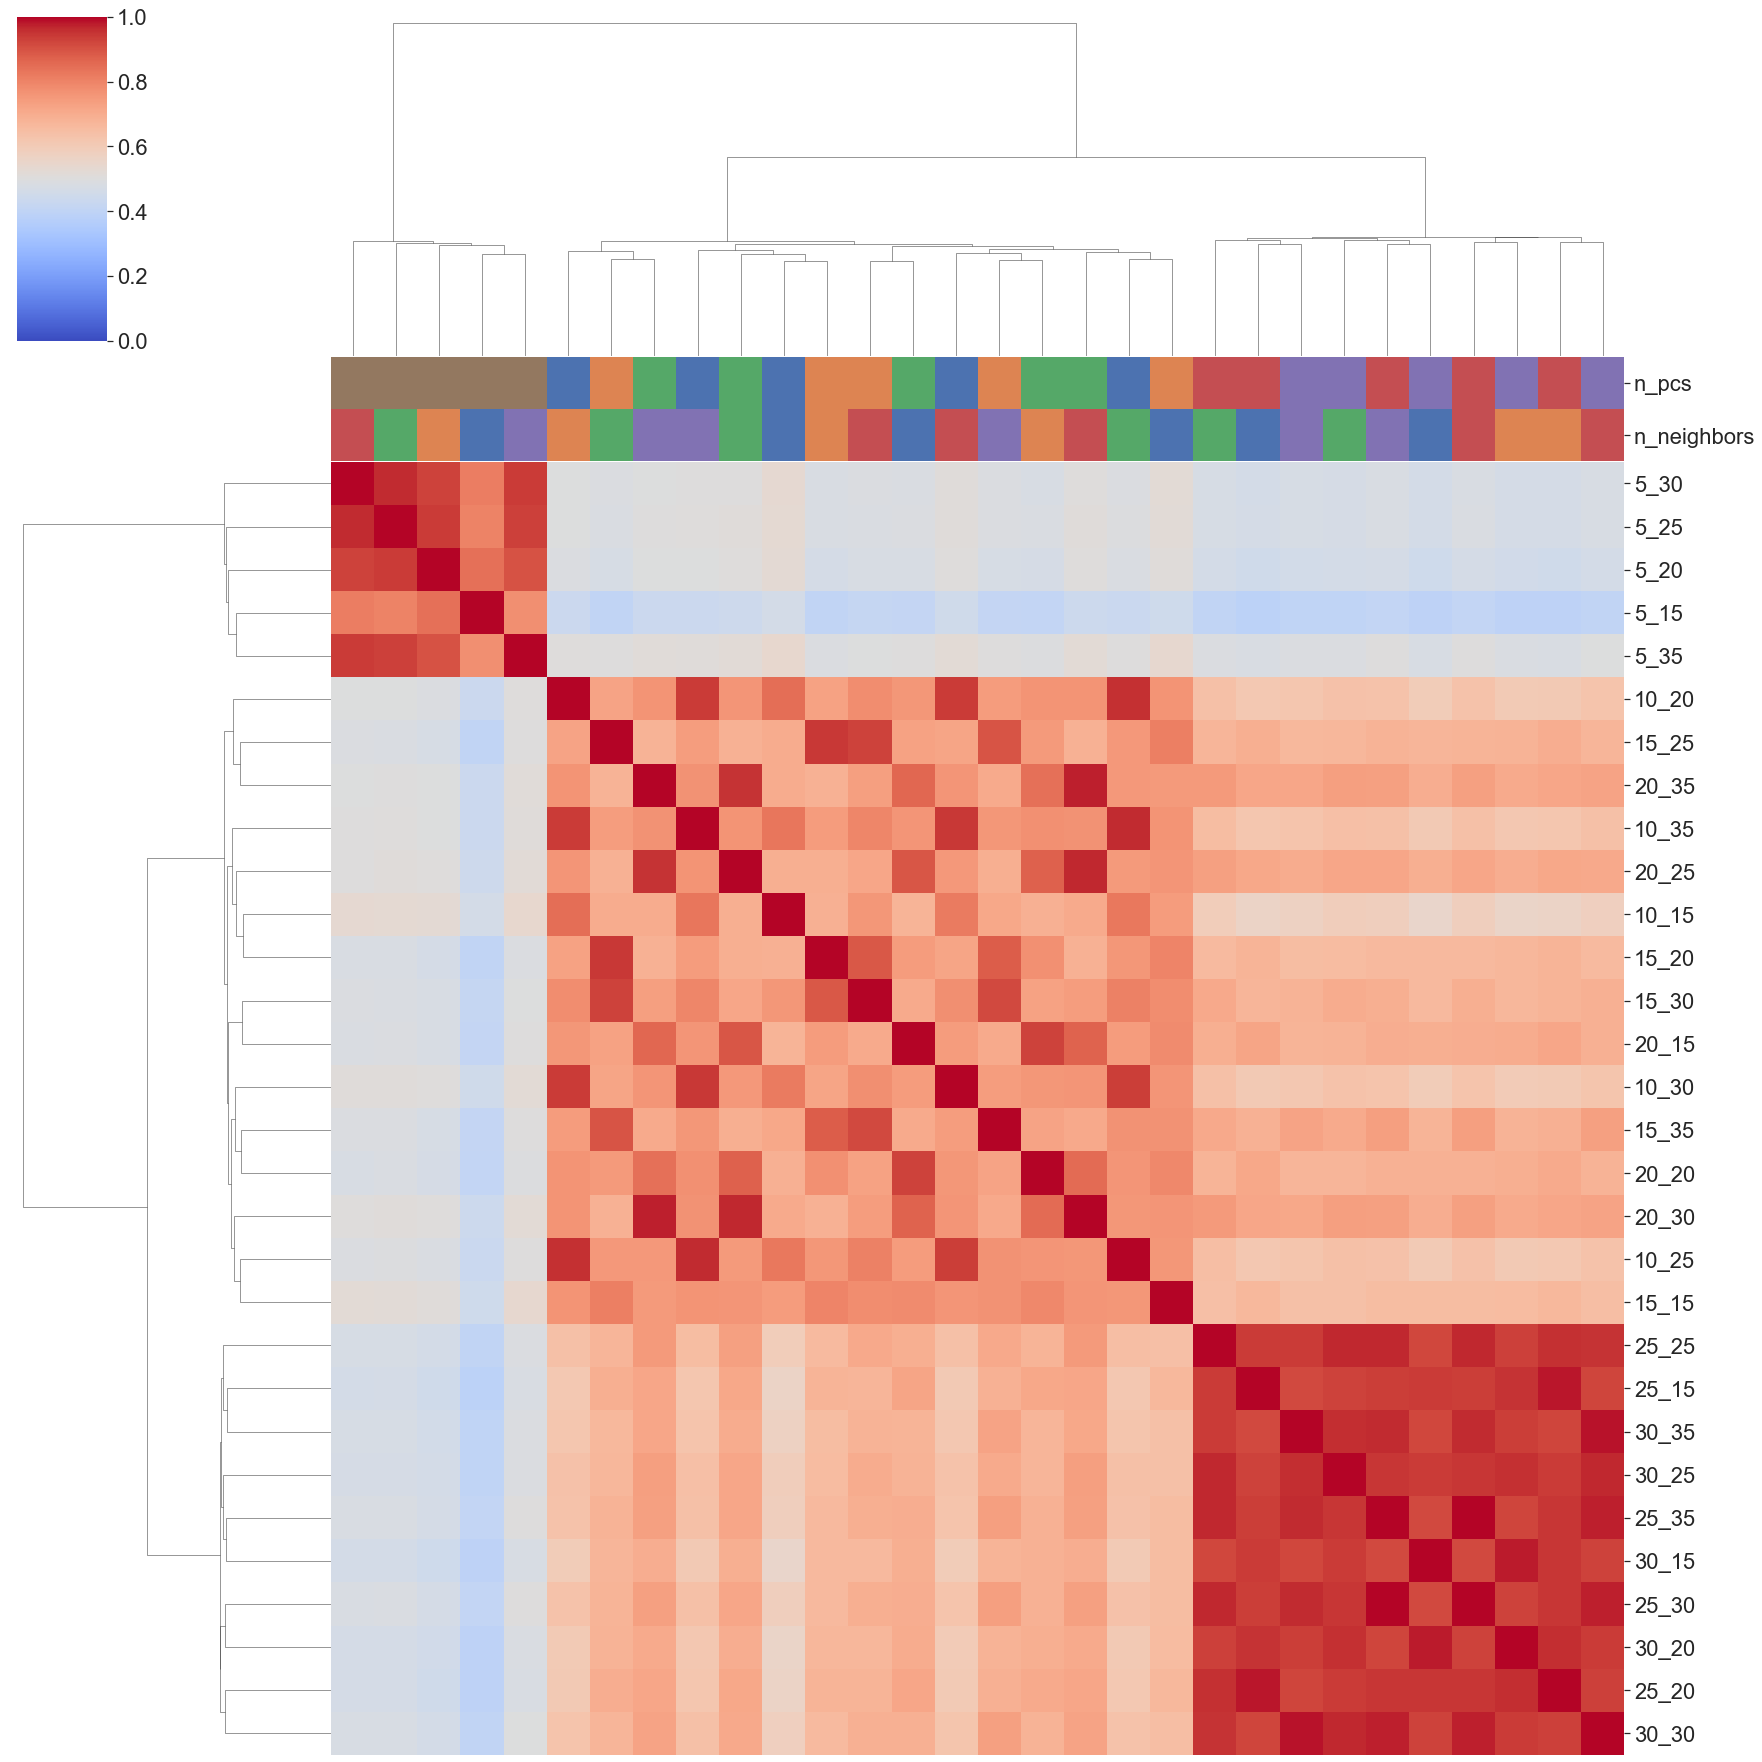

In [197]:
Lsdmf = Ldmf.copy()
Lcl = scipy.cluster.hierarchy.ward(Lsdmf)
for x in Lsdmf.index:
    Lsdmf.loc[x, x] = 1
sns.set(font_scale=2)

sns.clustermap(Lsdmf, col_colors=Lannot,xticklabels=[],
              yticklabels=Lsdmf.index, figsize=(25, 25),col_linkage=Lcl, 
               row_linkage=Lcl, vmin=0, vmax=1, 
              cmap="coolwarm", )#,row_cluster=False,col_cluster=False)
savefig(f"ClusterMap_Crypt_Leiden.pdf", dpi=300)

In [199]:
Lsdf0 = pd.DataFrame(0, index=Ldf.columns, columns=['n_pcs', 'n_neighbors','n_communities', 'ave_size', 'min_size', 'max_size'])

for p in pc:
    for n in nn:
        gr = d[p][n].obs['leiden']
        counts = gr.value_counts()
        Lsdf0.loc[f'{p}_{n}'] = [p, n, len(counts), np.mean(counts.values), np.min(counts.values),np.max(counts.values)]

In [201]:
Lsdf0

,n_pcs,n_neighbors,n_communities,ave_size,min_size,max_size
5_15,5,15,20,224.800000,68,415
5_20,5,20,17,264.470588,46,416
5_25,5,25,16,281.000000,116,432
5_30,5,30,16,281.000000,116,422
5_35,5,35,16,281.000000,116,474
10_15,10,15,20,224.800000,1,471
10_20,10,20,18,249.777778,33,589
10_25,10,25,19,236.631579,3,542
10_30,10,30,19,236.631579,11,583
10_35,10,35,17,264.470588,76,566


In [214]:
Lsdf0['resolution'] =1

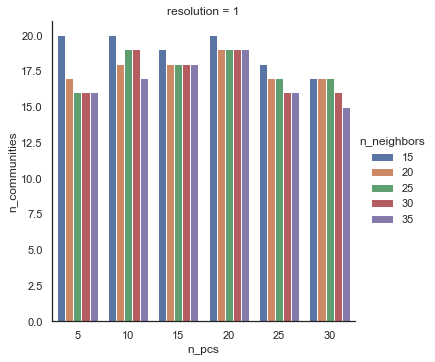

In [223]:
sns.set_style('white')
sns.catplot(data = Lsdf0, x='n_pcs',
            y='n_communities', hue='n_neighbors', 
            col='resolution', kind='bar', 
            col_wrap=1,sharex=False, sharey=False,)
savefig("Community_Count_Crypt_Leiden.pdf", dpi=300)

In [202]:
P = []
N = []
C = []
for p in pc:
    for n in nn:
        gr = d[p][n].obs['leiden']
        counts = gr.value_counts()
        n_c = len(counts)
        P = P + ([p] * n_c)
        N = N + ([n] * n_c)
        C = C + list(counts.values)
Lsdf1 = pd.DataFrame([P, N, C], index=['n_pcs', 'n_neighbors', 'size']).T

In [ ]:
sns.set_

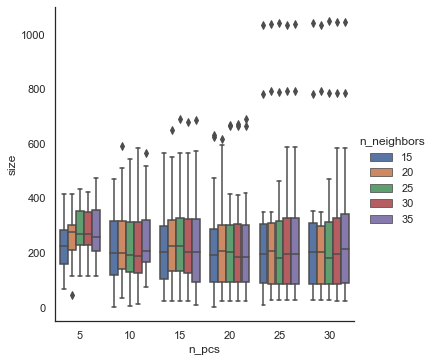

In [218]:
sns.set_style('white')
sns.catplot(data = Lsdf1, x='n_pcs', y='size', hue='n_neighbors', 
             kind='box', 
            sharex=False, sharey=False)
savefig("Community_Size_Crypt_Leiden.pdf", dpi=300)

In [229]:
sdf0.head()

,n_pcs,n_neighbors,level,n_communities,ave_size,min_size,max_size
5_15_0,5,15,0,149,30.174497,1,71
5_15_1,5,15,1,32,140.500000,15,344
5_15_2,5,15,2,10,449.600000,80,1112
5_15_3,5,15,3,5,899.200000,180,1916
5_15_4,5,15,4,2,2248.000000,180,4316


In [230]:
Lsdf0.head()

,n_pcs,n_neighbors,n_communities,ave_size,min_size,max_size,resolution
5_15,5,15,20,224.800000,68,415,1
5_20,5,20,17,264.470588,46,416,1
5_25,5,25,16,281.000000,116,432,1
5_30,5,30,16,281.000000,116,422,1
5_35,5,35,16,281.000000,116,474,1
